<a href="https://colab.research.google.com/github/anikarajvanshi20/Projects_Portfolio/blob/main/Modelling_Hebbian_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computational Neuroscience Final Project Report: Modelling Hebbian Learning with Oja’s Rule in Synthetic and Real Neural Data

##Introduction
Hebbian learning is a well-known neuroscience principle that claims that neurons that
fire together wire together (Hebb, 1949). The rule suggests that when a neuron consistently
activates another neuron, the synaptic connection between them strengthens and becomes more
effective. It reflects associative learning, where repeated co-activation leads to stronger
associations. Hebb’s rule has been the basis for understanding how neural networks learn from
input patterns. However, its simple formulations that often results in unbounded growth of
synaptic weights make it difficult to model computationally. To fill this gap, Oja (1982)
proposed a biologically plausible rule, known as the Oja’s rule, which introduced a
normalization term that set to stabilize learning.   
This adjustment not only prevents instability in the model but also lends the learning
rule with a mathematical property. It approximates the principal component analysis (PCA),
aligning synaptic weights with the directions of maximum variance in the input data (Sanger,
1989). Oja’s rule is also considered biologically plausible because it relies solely on local
information to the synapse which is the pre- and post-synaptic activity (Abbott & Dayan, 2005).
This project aims to model Hebbian learning through Oja’s rule in synthetic data as suggested
by the exercises on the Neuronal Dynamics website (Oja’s Hebbian Learning Rule — Neuronal
Dynamics Exercises, 2016). The equation often used as suggested by Peter Dayan is mentioned
below. Alpha is always positive.

τw * dw/dt = vu - αv^2w

• w is the weight vector
• u is the input vector
• v is the output activity

Thought Process
The project has three subparts. The first involves replicating Oja’s rule on synthetic data
using the neurodynex3 package. The second involves extending the rule to 2 neurons to see
how it functions in a multi-neuron setting and visualizing it using a 3D plot. The last includes
applying the rule to real calcium imaging data imported from the Allen Brain Observatory
(Allen Institute, n.d.). Each stage aided in reinforcing core concepts in learning, and the final
application to biological data enabled me to bridge theoretical insights with real-world
neuroscience.  

##First stage

In [ ]:
!pip install neurodynex3

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import neurodynex3.ojas_rule.oja as oja

# Utility function to plot weight norm
def plot_weight_norm(wcourse):
    norm = np.linalg.norm(wcourse, axis=1)
    plt.figure()
    plt.plot(norm)
    plt.title('Norm of the Weight Vector Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Norm')
    plt.show()

# Oja's rule (eta=0.04)

cloud = oja.make_cloud(n=200, ratio=0.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.04)

# Plot: Data points + final weight
plt.figure()
plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=0.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.title('Data Cloud and Final Learned Weight Vector')
plt.show()

# Plot: Weight components over time
plt.figure()
plt.plot(wcourse[:, 0], label='w1', color='g')
plt.plot(wcourse[:, 1], label='w2', color='b')
plt.legend()
plt.title('Evolution of Weights Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Weight Value')
plt.show()

print("Final learned weight vector: ({:.3f}, {:.3f})".format(wcourse[-1,0], wcourse[-1,1]))

# Circular Data (ratio=1)

plt.figure()
for i in range(10):
    cloud = oja.make_cloud(n=200, ratio=1)
    wcourse = oja.learn(cloud, eta=0.04)
    plt.plot(wcourse[:, 0], alpha=0.5)
    plt.plot(wcourse[:, 1], alpha=0.5)
plt.title('Weight Evolution on Circular Data (Multiple Runs)')
plt.xlabel('Time Steps')
plt.ylabel('Weight Value')
plt.show()

# Elliptical Data (ratio=0.3)

plt.figure()
for i in range(10):
    cloud = oja.make_cloud(n=200, ratio=0.3)
    wcourse = oja.learn(cloud, eta=0.04)
    plt.plot(wcourse[:, 0], alpha=0.5)
    plt.plot(wcourse[:, 1], alpha=0.5)
plt.title('Weight Evolution on Elliptical Data (Multiple Runs)')
plt.xlabel('Time Steps')
plt.ylabel('Weight Value')
plt.show()

# Final weights
cloud = oja.make_cloud(n=500, ratio=0.3, angle=45)
wcourse = oja.learn(cloud, eta=0.04)
final_w = wcourse[-1]
print("\nFinal learned weight vector on elliptical data: ({:.3f}, {:.3f})".format(final_w[0], final_w[1]))

# Finding input that maximizes and minimizes output
v_max = final_w / np.linalg.norm(final_w)
v_min = -v_max
print("Input that maximizes output (v_max): ", v_max)
print("Input that minimizes output (v_min): ", v_min)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 75.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: numpy
    Fou

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In the first part, I used a single neuron trained with Oja’s rule to learn features from 2D Gaussian data clouds. I then tested two different types of clouds.  

*   A circular cloud – The data set had no correlations and no clear principal direction.
*   An elliptical cloud – Had a dominant axis of variance.

Using the neurodynex3 package, I trained the neuron and tracked how the synaptic weight vector evolved over time the known behaviour of Oja’s rule. On the circular data cloud, the weight vector shows random walk behaviour with no consistent direction since there is no
dominant principal component. On the elliptical cloud, the weight vector reliably converged to
the principal axis, confirming the circular cloud, the weight direction drifted due to the lack of
a dominant feature, and the norm of the vector tended to decay over time. These visuals confirm
that Oja’s rule finds the principal axis only when there is a clear variance structure.

##Second Stage

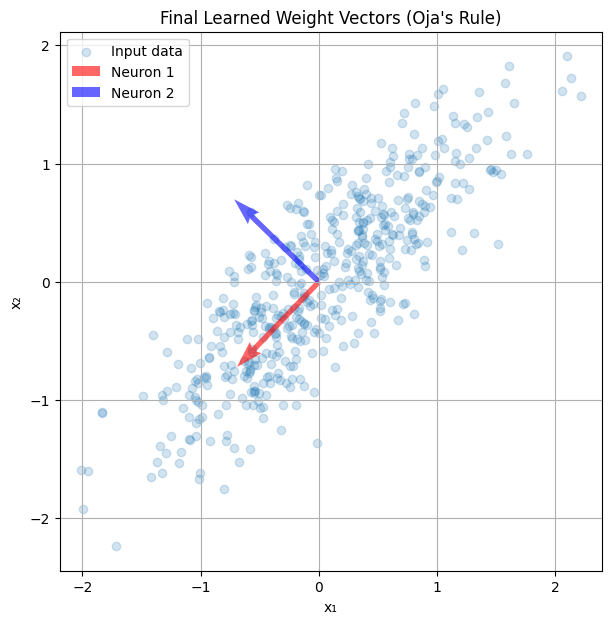

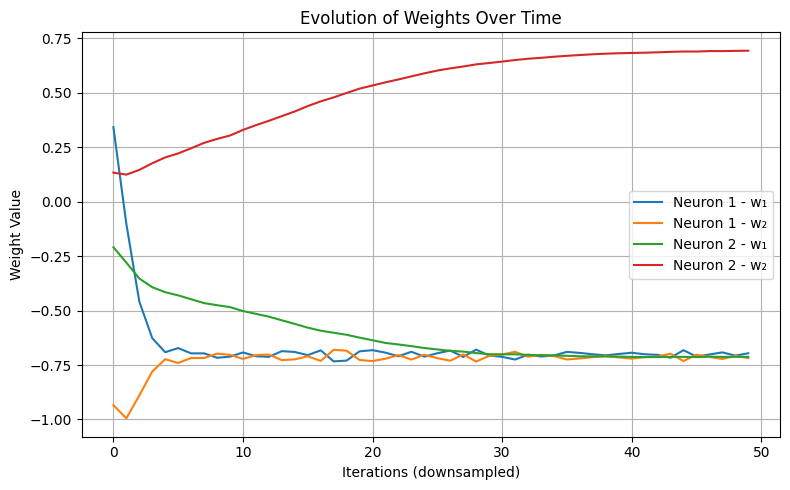

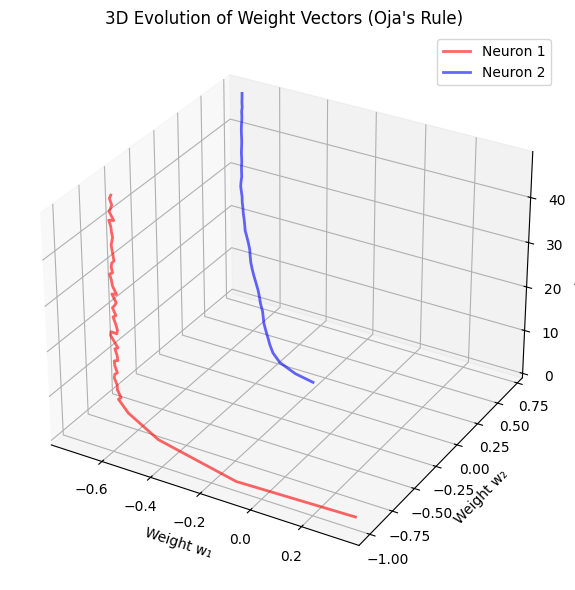

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gaussian input cloud
def generate_input_cloud(n_samples=500, angle_deg=45, ratio=0.3):
    angle_rad = np.deg2rad(angle_deg)
    rot = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                    [np.sin(angle_rad),  np.cos(angle_rad)]])
    cov = np.diag([1.0, ratio**2])
    cloud = np.random.randn(n_samples, 2) @ np.linalg.cholesky(cov).T
    cloud = cloud @ rot.T
    return cloud

# Oja’s learning rule for multiple neurons

def sanger_learning(X, n_neurons=2, eta=0.01, n_epochs=5):
    n_samples, n_inputs = X.shape
    W = np.random.randn(n_neurons, n_inputs)
    weight_history = []

    for epoch in range(n_epochs):
        np.random.shuffle(X)
        for x in X:
            x = x.reshape(-1, 1)
            y = W @ x

            for i in range(n_neurons):
                projection = sum((y[j, 0] * W[j].reshape(-1, 1) for j in range(i + 1)))
                delta_w = eta * y[i, 0] * (x - projection)
                W[i:i+1] += delta_w.T

            weight_history.append(W.copy())

    return np.array(weight_history), W

def plot_weights_and_data(X, final_W):
    plt.figure(figsize=(7,7))
    plt.scatter(X[:, 0], X[:, 1], alpha=0.2, label="Input data")
    origin = np.zeros(2)
    colors = ['red', 'blue']
    for i in range(final_W.shape[0]):
        normed_vec = final_W[i] / np.linalg.norm(final_W[i])
        plt.quiver(*origin, *normed_vec, angles='xy', scale_units='xy',
                   scale=1, color=colors[i], label=f"Neuron {i+1}", width=0.01, alpha=0.6)
    plt.axis("equal")
    plt.legend()
    plt.title("Final Learned Weight Vectors (Oja's Rule)")
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.grid(True)
    plt.show()

# 2D Plot of weight evolution
def plot_weight_evolution(weight_history):
    weight_history = weight_history[::100]
    w1_hist = [w[0] for w in weight_history]
    w2_hist = [w[1] for w in weight_history]

    plt.figure(figsize=(8, 5))
    plt.plot([w[0] for w in w1_hist], label="Neuron 1 - w₁")
    plt.plot([w[1] for w in w1_hist], label="Neuron 1 - w₂")
    plt.plot([w[0] for w in w2_hist], label="Neuron 2 - w₁")
    plt.plot([w[1] for w in w2_hist], label="Neuron 2 - w₂")
    plt.title("Evolution of Weights Over Time")
    plt.xlabel("Iterations (downsampled)")
    plt.ylabel("Weight Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3D Plot of weight trajectory over time
def plot_3d_weight_trajectories(weight_history):
    weight_history = weight_history[::100]
    w1_w1 = [w[0][0] for w in weight_history]
    w1_w2 = [w[0][1] for w in weight_history]
    w2_w1 = [w[1][0] for w in weight_history]
    w2_w2 = [w[1][1] for w in weight_history]
    time_steps = np.arange(len(weight_history))

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(w1_w1, w1_w2, time_steps, label='Neuron 1', color='red', linewidth=2, alpha=0.6)
    ax.plot(w2_w1, w2_w2, time_steps, label='Neuron 2', color='blue', linewidth=2, alpha=0.6)

    ax.set_xlabel('Weight w₁')
    ax.set_ylabel('Weight w₂')
    ax.set_zlabel('Time step')
    ax.set_title("3D Evolution of Weight Vectors (Oja's Rule)")
    ax.legend()
    plt.tight_layout()
    plt.show()

X = generate_input_cloud(n_samples=500, angle_deg=45, ratio=0.3)
weight_history, final_W = sanger_learning(X, n_neurons=2, eta=0.01, n_epochs=10)
plot_weights_and_data(X=X, final_W=final_W)
plot_weight_evolution(weight_history)
plot_3d_weight_trajectories(weight_history)


To go beyond the single-neuron case, I implemented a network of two output neurons,
each governed by a modified form of Oja’s rule. This involved adapting the learning dynamics
to ensure that the second neuron learns a feature orthogonal to the first which involved
implementing the Generalized Hebbian Algorithm (Sanger’s rule).
In this model:
*   Each neuron receives the same 2D input.
*   The first neuron learns the dominant principal component.
*   The second neuron is constrained to learn a component orthogonal to the first (the second principal component).

This extension demonstrates unsupervised decorrelation which means that the neurons
specialize in distinct input features. This is key in Sanger’s rule that focuses on specialization.
Neuron 1 follows Oja’s rule due to having a dominant principal component, while neuron 2
follows Sanger’s rule. One weight from neuron 2 often converges with the weights of neurons
1 over time, displaying the learning model in the first stage for elliptical data. Building a two
output network along with ensuring proper orthogonalization was an analytical challenge that
helped deepen my understanding of how biologically plausible networks can perform multi
feature processes. It also gave me insight into how Sanger’s rule builds on Oja’s rule.  

##Third Stage

/usr/local/lib/python3.11/dist-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace 

Fluorescence shape (neurons x time): (12, 48316)


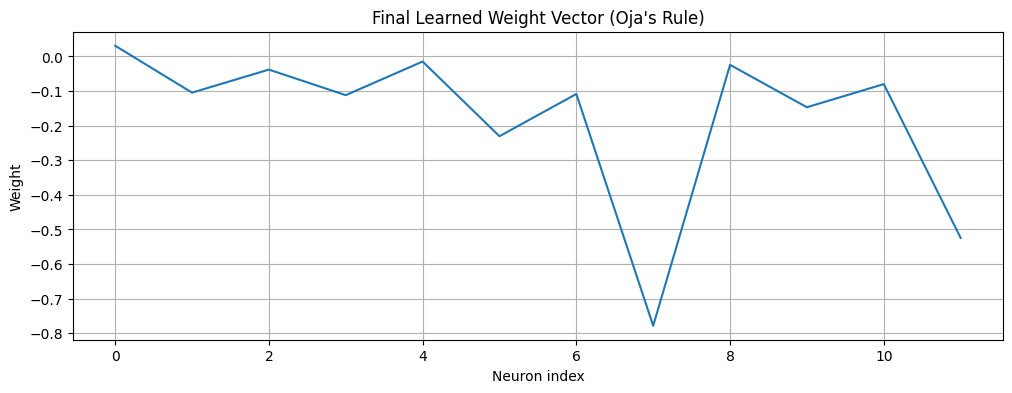

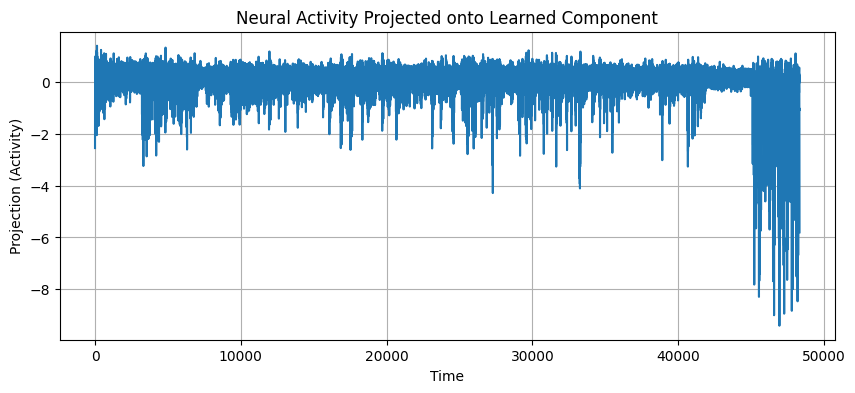

In [ ]:
!pip install allensdk numpy matplotlib

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache
import os
import numpy as np
import matplotlib.pyplot as plt

data_dir = "./allen_data"
os.makedirs(data_dir, exist_ok=True)
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_dir)

experiment_table = cache.get_ophys_experiment_table()
experiment_id = experiment_table.index[0]
experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id=experiment_id)

traces = experiment.dff_traces
fluorescence = np.vstack(traces['dff'].values)  # shape: (neurons, time)

print("Fluorescence shape (neurons x time):", fluorescence.shape)

X = fluorescence.T  # shape: (time, neurons)
X = X - np.mean(X, axis=0)  # Center each neuron's activity

# Oja's learning rule
def oja_learning(X, eta=0.001, n_epochs=5):
    n_samples, n_inputs = X.shape
    w = np.random.randn(n_inputs)
    w = w / np.linalg.norm(w)
    w_trajectory = []

    for epoch in range(n_epochs):
        for x in X:
            y = np.dot(w, x)
            w += eta * y * (x - y * w)
            w = w / np.linalg.norm(w)
        w_trajectory.append(w.copy())
    return np.array(w_trajectory)

weights_over_time = oja_learning(X, eta=0.001, n_epochs=5)
final_weights = weights_over_time[-1]

# Ploting final weights
plt.figure(figsize=(12, 4))
plt.plot(final_weights)
plt.title("Final Learned Weight Vector (Oja's Rule)")
plt.xlabel("Neuron index")
plt.ylabel("Weight")
plt.grid(True)
plt.show()

# The final weight vector
projection = X @ final_weights

plt.figure(figsize=(10, 4))
plt.plot(projection)
plt.title("Neural Activity Projected onto Learned Component")
plt.xlabel("Time")
plt.ylabel("Projection (Activity)")
plt.grid(True)
plt.show()

The final part of the project was to apply Oja’s rule to real neural data. I used the Allen Brain Observatory dataset, which provides ΔF/F calcium imaging traces from populations of neurons in the mouse visual cortex during visual stimulation experiments.

Using the AllenSDK function, I selected a recording session and extracted ΔF/F activity from a subset of neurons. After standardizing the data, I trained a single Oja neuron on the activity traces. The resulting weight vector assigns a weight to each neuron based on how strongly it contributes to shared patterns in population activity. I then projected the neural activity onto the learned weight vector, obtaining a time series that captures the dominant population activity mode. This projection effectively functions like the first principal component, identifying coordinated fluctuations across the model.

This analysis demonstrated that Oja’s rule can be used not only for synthetic inputs but also for real, noisy neural signals. While I did not attempt a full interpretation of the projection in terms of experimental stimuli. since it was out of my scope due to complexity, the result shows that biologically inspired learning rules can extract meaningful structure from complex data. This section allowed me to apply my learnings from the previous sections to real experimental neuroscience data.

##AI disclosure

I used ChatGPT to help expand the code from the neurodynamic exercises. For the
second stage I asked it to modify the original code to include 2 neurons and include sanger’s
rule. For the third stage I asked which dataset would be the best to apply the code to and it
suggested the Allen dataset. Then I asked it to help me create a code to extract the appropriate
data. Then I asked it to generate the appropriate code that integrates the data in my model. I
also used the AI to proof check my code at several places.

##References

Abbott, L. F., & Dayan, P. (2005). Theoretical Neuroscience: Computational and Mathematical Modeling of Neural Systems. MIT Press.

Allen Institute. (n.d.). Allen Institute. Retrieved 6 May 2025, from https://alleninstitute.org/   

OpenAI. (2025, May 6). Response from ChatGPT [Large language model]. OpenAI. https://chat.openai.com/chat   

D.o Hebb. (1949). The Organization Of Behavior. http://archive.org/details/in.ernet.dli.2015.226341

Oja, E. (1982). Simplified neuron model as a principal component analyzer. Journal of Mathematical Biology, 15(3), 267–273. https://doi.org/10.1007/BF00275687  

Oja’s hebbian learning rule—Neuronal Dynamics Exercises. (2016).
https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/ojas-rule.html

Sanger, T. D. (1989). Optimal unsupervised learning in a single-layer linear feedforward
neural network. Neural Networks, 2(6), 459–473. https://doi.org/10.1016/08936080(89)90044-0